In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import symmetric_top as sy

Now, we give a kick to the rotation axis, it will be 

$\theta(0)=\theta_0$

$\dot{\theta}(0) = \dot{\theta}_0 $

$\dot{\phi}(0) = 0$

we can add the additional boundary condition

$\dot{\psi}(0)=\dot{\psi}_0$

which implies

$\alpha = \left( \dot{\theta}_0^2+\dot{\phi}_0^2\sin^2(\theta_0)\right) + 2\frac{Mgl}{I}\cos(\theta_0) = \dot{\theta}_0^2+ \beta\cos(\theta_0) $

$ a = \frac{I_3}{I} \dot{\psi}_0 $

$ b = \frac{I_3}{I} \dot{\psi}_0 \cos(\theta_0) = a\cos(\theta_0) $

In [2]:
# condition 1 (kick )
#cond = np.array([1.0, np.pi/6.0, -0.4, 1.0, 2.0])
#num_pers = 5
# condition 2 (bigger kick )
cond = np.array([1.0, np.pi/6.0, 0.8, 1.0, 2.0])
num_pers = 5

In [3]:
beta = cond[0]
theta_0 = cond[1]
d_theta_0 = cond[2]
d_psi_0 = cond[3]
i_rat = cond[4]

In [4]:
alpha = d_theta_0**2+beta*np.cos(theta_0)
a = i_rat*d_psi_0
b = a*np.cos(theta_0)

In [5]:
st = sy.SymTopIniCond(alpha, beta, a, b, i_rat)

Motion confined between  0.269283681463  and  1.19004083663
Half period is 1.6808757236932723


In [6]:
print('This is the smallest value', st.u_l)
print('This is the largest value ', st.u_r)
print('This is u prime ', st.u_prime)

This is the smallest value 0.37162196048757457
This is the largest value  0.9639617137608382
This is u prime  0.866025403784


In [7]:
num_pnts = 200
num_periods = num_pers
sol = st.solv_eqn(num_pnts, num_periods)

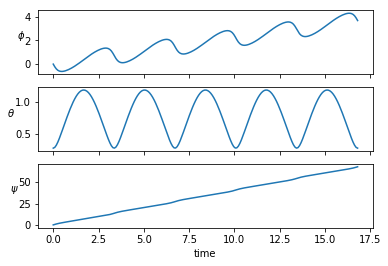

In [8]:
fig, ax = plt.subplots(3, sharex=True)
var = [r'$\phi$', r'$\theta$', r'$\psi$']
for ind in range(3):
    ax[ind].plot(st.time, sol[:, ind])    
    yl = ax[ind].set_ylabel(var[ind])
    yl.set_rotation(0)
ax[2].set_xlabel('time')
plt.show()

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


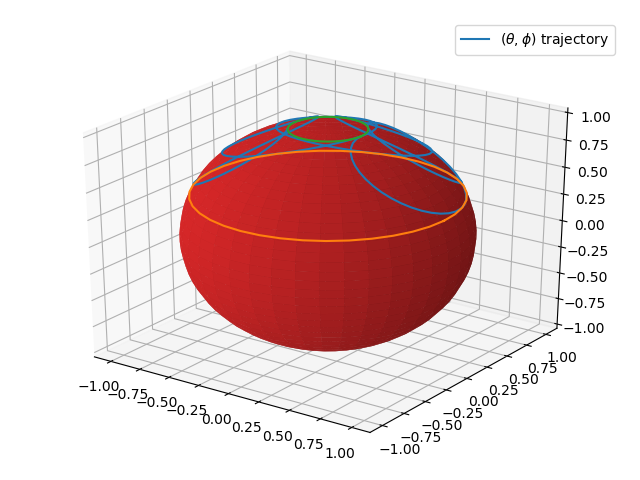

In [10]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.sin(sol[:, 1])*np.cos(sol[:, 0])
y = np.sin(sol[:, 1])*np.sin(sol[:, 0])
z = np.cos(sol[:, 1])
ax.plot(x, y, z, label=r'$(\theta, \phi)$ trajectory')

num = 40
us = np.linspace(0, np.pi, num)
vs = np.linspace(0, 2 * np.pi, num)

theta = [st.th_1, st.th_2]
for inv, th in enumerate(theta):
    x = np.sin(th)*np.cos(vs)
    y = np.sin(th)*np.sin(vs)
    z = np.cos(th)
    ax.plot(x, y, z)

xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)

ax.legend()
fig.tight_layout()
plt.show()

In [10]:
print(np.pi/6.0)

0.5235987755982988


In [10]:
print(sol[-1])

[ 6.4234572   2.24343738 -0.62664311]


In [11]:
print(2*np.pi)

6.283185307179586
